In [1]:
import numpy as np
from matplotlib import pyplot as plt

def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X, axis = 0)
    
    #Step-2
    cov_mat = np.cov(X_meaned, rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    print("eigen vectors: ", "\n")
    print(sorted_eigenvectors)
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    print(eigenvector_subset)
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced, sorted_eigenvalue

In [4]:
import pandas as pd
 
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced, sorted_eigenvalue = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


eigen vectors:  

[[-0.36158968  0.65653988  0.58099728  0.31725455]
 [ 0.08226889  0.72971237 -0.59641809 -0.32409435]
 [-0.85657211 -0.1757674  -0.07252408 -0.47971899]
 [-0.35884393 -0.07470647 -0.54906091  0.75112056]]
[[-0.36158968  0.65653988]
 [ 0.08226889  0.72971237]
 [-0.85657211 -0.1757674 ]
 [-0.35884393 -0.07470647]]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

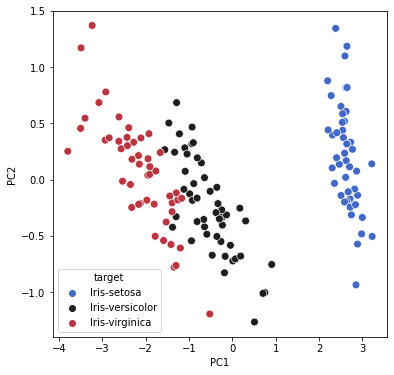

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [6]:
sorted_eigenvalue

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [7]:
tot = sum(sorted_eigenvalue)
var_exp = [(i / tot)*100 for i in sorted_eigenvalue]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[92.46162071742687, 5.301556785053501, 1.7185139525006734, 0.5183085450189561]
[ 92.46162072  97.7631775   99.48169145 100.        ]


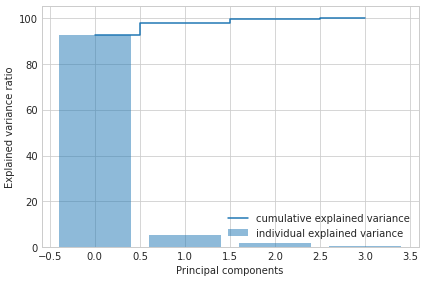

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()